In [12]:
#importing the dataset
import pandas as pd
data=pd.read_csv('imdb_top_movies.csv')
data

,Rank,Title,Year,Rating,Duration,IMDb URL,Image URL
0,1,The Shawshank Redemption,1994,9.3,2h 22m,https://www.imdb.com/title/tt0111161/,https://m.media-amazon.com/images/M/MV5BMDAyY2...
1,2,The Godfather,1972,9.2,2h 55m,https://www.imdb.com/title/tt0068646/,https://m.media-amazon.com/images/M/MV5BNGEwYj...
2,3,The Dark Knight,2008,9.1,2h 32m,https://www.imdb.com/title/tt0468569/,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,The Godfather Part II,1974,9.0,3h 22m,https://www.imdb.com/title/tt0071562/,https://m.media-amazon.com/images/M/MV5BMDIxMz...
4,5,12 Angry Men,1957,9.0,1h 36m,https://www.imdb.com/title/tt0050083/,https://m.media-amazon.com/images/M/MV5BYjE4Nz...
...,...,...,...,...,...,...,...
245,246,The Grapes of Wrath,1940,8.1,2h 9m,https://www.imdb.com/title/tt0032551/,https://m.media-amazon.com/images/M/MV5BZDgzZj...
246,247,To Be or Not to Be,1942,8.1,1h 39m,https://www.imdb.com/title/tt0035446/,https://m.media-amazon.com/images/M/MV5BMTA5OT...
247,248,Gangs of Wasseypur,2012,8.2,5h 21m,https://www.imdb.com/title/tt1954470/,https://m.media-amazon.com/images/M/MV5BMTc5Nj...
248,249,Drishyam,2015,8.2,2h 43m,https://www.imdb.com/title/tt4430212/,https://m.media-amazon.com/images/M/MV5BM2NmMG...


In [21]:
#dropping Image UR and movie URL cause we don't need it
data=data.drop(['IMDb URL','Image URL'],axis=1)

In [197]:
#trying to convert Duration into integer values
data.iloc[:,4]

0      142
1      175
2      152
3      202
4       96
      ... 
245    129
246     99
247    321
248    163
249    146
Name: Duration in minutes, Length: 250, dtype: int64

In [123]:
#there's one duration values which only contains minutes in format '#Mm' which's in index 205
#the others are in the format of '%Hh %Mm'
from datetime import time
for i in range(0,250):
    if(i!=205):
        data.iloc[i,4]=pd.to_datetime(data.iloc[i,4],format='%Hh %Mm')
data.iloc[205,4]=pd.to_datetime(data.iloc[205,4],format='%Mm')

In [125]:
data

,Rank,Title,Year,Rating,Duration
0,1,The Shawshank Redemption,1994,9.3,1900-01-01 02:22:00
1,2,The Godfather,1972,9.2,1900-01-01 02:55:00
2,3,The Dark Knight,2008,9.1,1900-01-01 02:32:00
3,4,The Godfather Part II,1974,9.0,1900-01-01 03:22:00
4,5,12 Angry Men,1957,9.0,1900-01-01 01:36:00
...,...,...,...,...,...
245,246,The Grapes of Wrath,1940,8.1,1900-01-01 02:09:00
246,247,To Be or Not to Be,1942,8.1,1900-01-01 01:39:00
247,248,Gangs of Wasseypur,2012,8.2,1900-01-01 05:21:00
248,249,Drishyam,2015,8.2,1900-01-01 02:43:00


In [137]:
#Now we transform hours to minutes with multiplying them by 60 and we add them to minutes
data['Duration']=pd.to_datetime(data['Duration'])
data['Duration']=data['Duration'].dt.hour*60+data['Duration'].dt.minute

In [139]:
data

,Rank,Title,Year,Rating,Duration
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.1,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96
...,...,...,...,...,...
245,246,The Grapes of Wrath,1940,8.1,129
246,247,To Be or Not to Be,1942,8.1,99
247,248,Gangs of Wasseypur,2012,8.2,321
248,249,Drishyam,2015,8.2,163


In [141]:
#we change column name from Duration to Duration in minutes
data.columns

Index(['Rank', 'Title', 'Year', 'Rating', 'Duration'], dtype='object')

In [143]:
data.columns=['Rank', 'Title', 'Year', 'Rating', 'Duration in minutes']

In [145]:
data

,Rank,Title,Year,Rating,Duration in minutes
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.1,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96
...,...,...,...,...,...
245,246,The Grapes of Wrath,1940,8.1,129
246,247,To Be or Not to Be,1942,8.1,99
247,248,Gangs of Wasseypur,2012,8.2,321
248,249,Drishyam,2015,8.2,163


In [173]:
#Now let's create a linear rgression between movie ratings, Year and Duration
from sklearn.linear_model import LinearRegression
x=data[['Year','Duration in minutes']]
y=data['Rating']
model=LinearRegression()
model.fit(x,y)
coef=model.coef_
coef.round(5)
b=model.intercept_.round(5)

7.90868

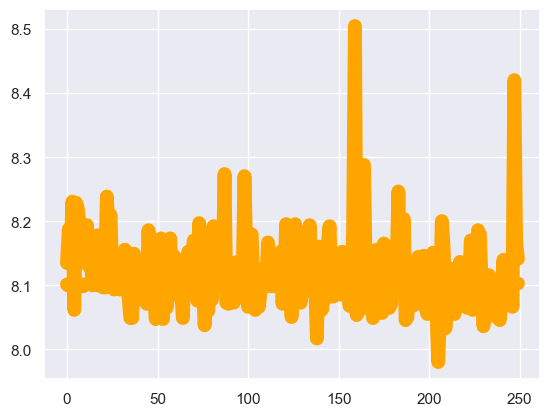

In [177]:
#plotting the regression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
yhat=coef*x+b
plt.plot(yhat,c='orange',lw=10)

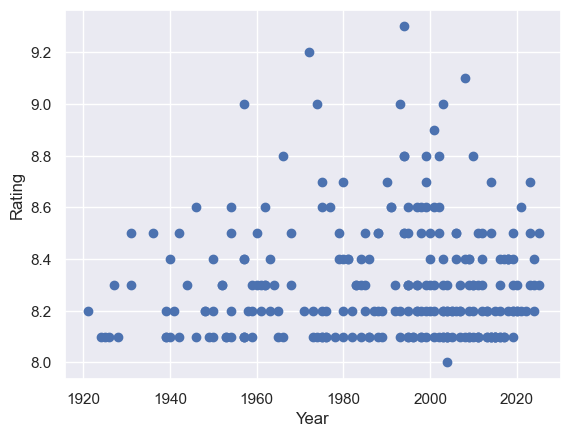

In [201]:
#plotting some different data
X=data[['Year']]
X1=data[['Duration in minutes']]
plt.scatter(X,y)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

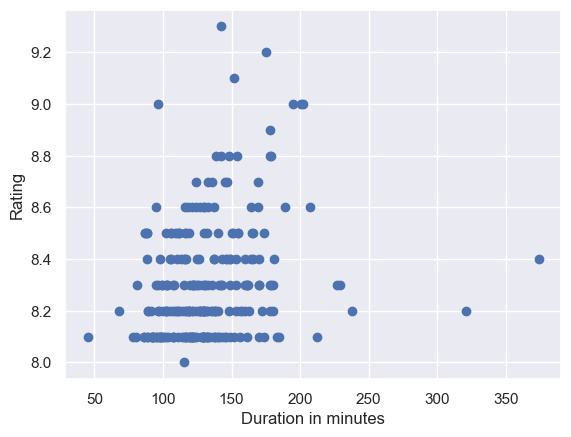

In [203]:
plt.scatter(X1,y)
plt.xlabel('Duration in minutes')
plt.ylabel('Rating')
plt.show()

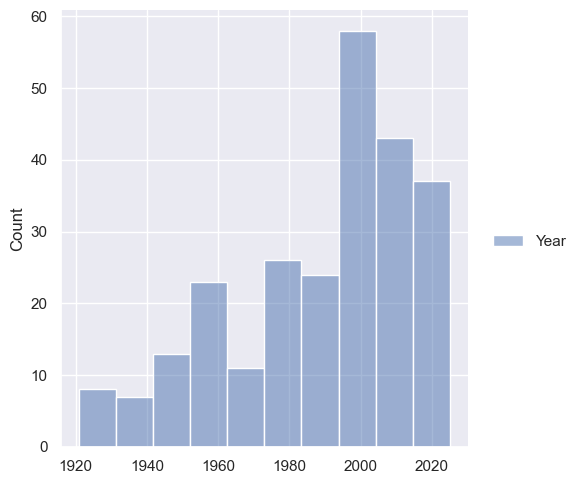

In [213]:
fig=sns.displot(X,label='Year distribution')

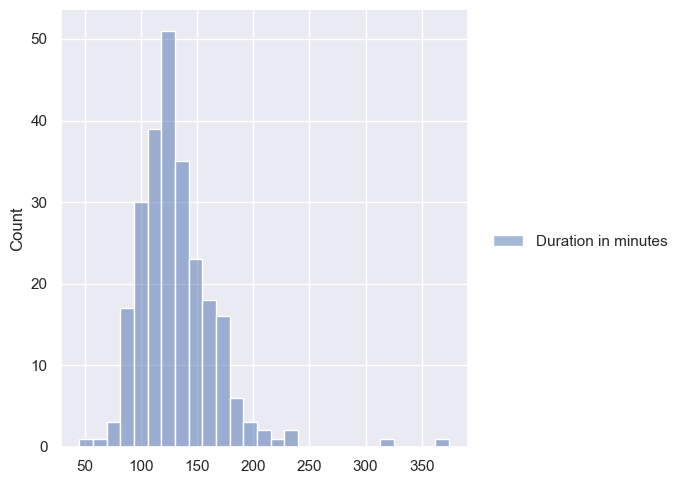

In [217]:
fig1=sns.displot(X1,label='Duration distribution')

Text(0.5, 1.0, 'Ratings distribution')

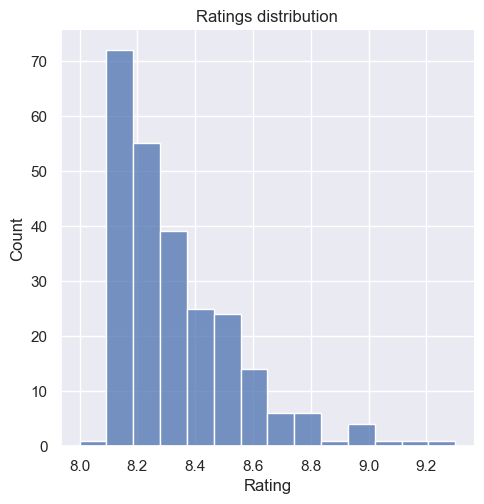

In [225]:
fig2=sns.displot(y,label='Ratings distribution')
plt.title('Ratings distribution')